In [2]:
import pandas as pd
# 1. Load the dataset
url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 2. Check for null values in each column

null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
print("Columns with null values:\n",null_columns)

Columns with null values:
 Age         177
Cabin       687
Embarked      2
dtype: int64


In [12]:
# 3. Fill null values in 'Age' with the mean of the column and 'Cabin' with 'Unknown'

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('Unknown')

# Check for null values in each column again
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
print("Columns with null values:\n",null_columns)

Columns with null values:
 Embarked    2
dtype: int64


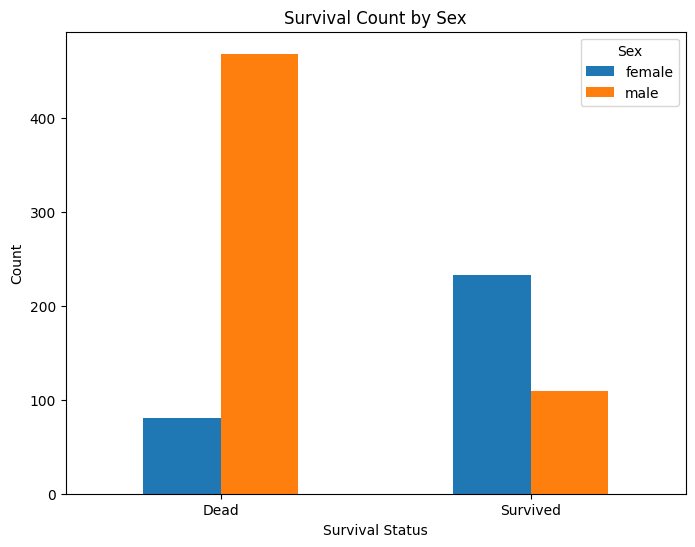

In [42]:
# 4. Plot the dataset with 2 bars; Survived, Dead. And include Female and Male survivors' measurement in each bar
import matplotlib.pyplot as plt

# Create a new column 'Survived_Text' to map the integer values of 'Survived' into string
df['Survived_Text'] = df['Survived'].map({0:'Dead',1:'Survived'})

# Group the data by 'Survived_Text' and 'Sex', then count the occurrences
grouped_data = df.groupby(['Survived_Text', 'Sex']).size().unstack()

# Create the bar plot
grouped_data.plot(kind='bar', figsize=(8, 6))
plt.title('Survival Count by Sex')
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.show()


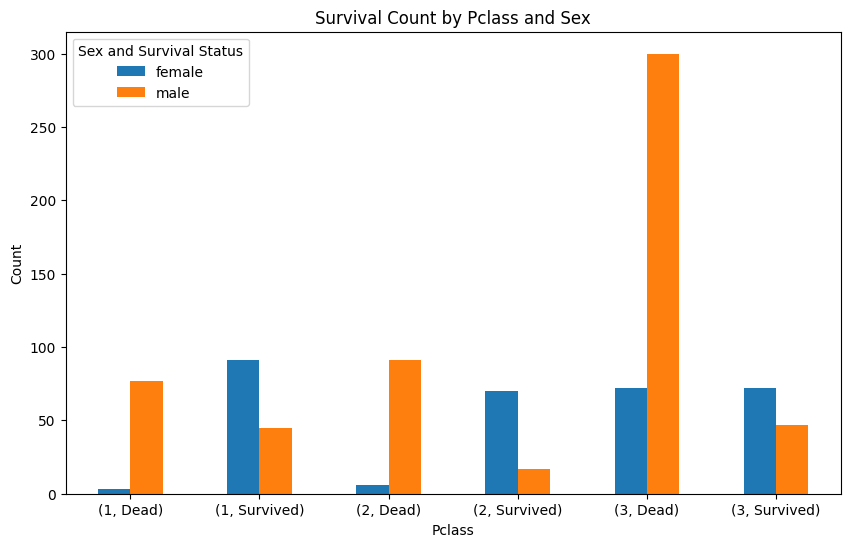

In [41]:
# 5. Follow the step 4 and include the Survived, and Dead bars amongst the 'Pclass'.
# Create a grouped bar plot of 'Pclass' with 'Survived' and 'Dead' counts, and 'Sex' breakdown
grouped_pclass = df.groupby(['Pclass', 'Survived_Text', 'Sex']).size().unstack()

# Plot the grouped bar chart
grouped_pclass.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Count by Pclass and Sex')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sex and Survival Status')
plt.show()


In [45]:
# 6. Create a column named 'AgeClass' and insert values;

def age_to_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

df['AgeClass'] = df['Age'].apply(age_to_class)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Text,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Dead,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Survived,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Dead,2


In [46]:
# 7. Now drop the column 'Age'.

df = df.drop(columns=['Age'])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Text,AgeClass
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,Unknown,S,Dead,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,Survived,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,Unknown,S,Survived,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,Survived,2
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,Unknown,S,Dead,2


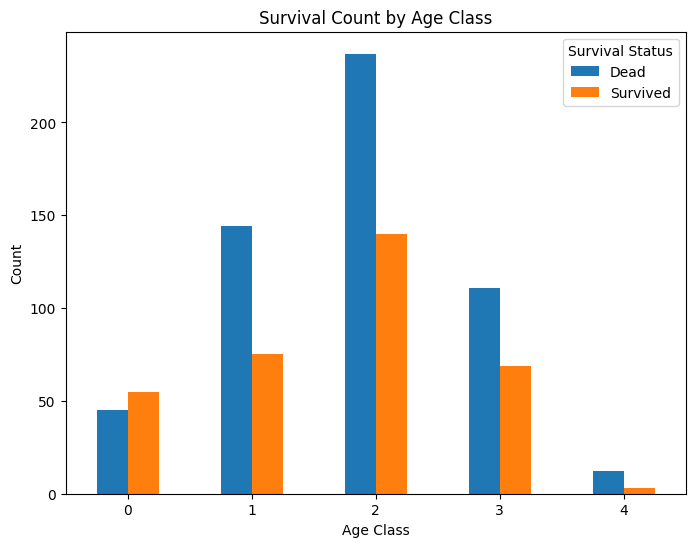

In [47]:
# Step 8: Create a bar plot of Survived and Dead using the value counts amongst 'AgeClass' groups.
age_class_survival = df.groupby(['AgeClass', 'Survived_Text']).size().unstack()

age_class_survival.plot(kind='bar', figsize=(8,6))
plt.title('Survival Count by Age Class')
plt.xlabel('Age Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Survival Status')
plt.show()
